# **Dependency and file imports**

In [3]:
# import dependencies 
# wordcloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

# sqlalchemy (live data connection)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, MetaData, Table, Column, Numeric,insert, Integer, VARCHAR, update, text, delete, func, inspect
from rds import rds_connection_string

# other
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import requests
from io import BytesIO

In [4]:
# create engine / connect to rds
engine = create_engine(rds_connection_string)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# **Create Eminem Lyrics Table**

In [5]:
# pull table of eminem's top ten from database
eminem_sql = text('SELECT * from eminemtoptenwords')

# fetch all records
eminem_album = engine.execute(eminem_sql).fetchall()
print(eminem_album)

[('pee', '0.663151071321805', 1302), ('ass', '0.24276229949196215', 1302), ('jams', '0.22131638313754323', 1302), ('nelly', '0.19041670456561902', 1302), ('move', '0.18729098654674628', 1302), ('seen', '0.17909302993093332', 1302), ('believe', '0.17015806907927983', 1302), ('way', '0.16535503826559103', 1302), ('dancer', '0.16107534772073087', 1302), ('belly', '0.1537129514539965', 1302), ('love', '0.22700268378222752', 1492), ('resuscitates', '0.22588261034863172', 1492), ('windpipe', '0.22588261034863172', 1492), ('right', '0.2254406671262595', 1492), ('huffing', '0.21567538329032365', 1492), ('feels', '0.19982533679119044', 1492), ('suffocate', '0.19822601338075793', 1492), ('lie', '0.19687247667064958', 1492), ('alright', '0.19655482111303374', 1492), ('fight', '0.19608206422296962', 1492), ('therapy', '0.5666603006844898', 1796), ('reaching', '0.4551110387939447', 1796), ('lately', '0.3907643887617892', 1796), ('reach', '0.35939988261161615', 1796), ('rock', '0.31513310942088635',

In [6]:
# convert to dataframe
eminem_top10 = pd.DataFrame(eminem_album)
eminem_top10.columns = ['key_word', 'TF-IDF', 'albumIndex']
eminem_top10

,key_word,TF-IDF,albumIndex
0,pee,0.663151071321805,1302
1,ass,0.24276229949196215,1302
2,jams,0.22131638313754323,1302
3,nelly,0.19041670456561902,1302
4,move,0.18729098654674628,1302
...,...,...,...
3765,mean,0.06894938375898486,5784
3766,cause,0.03727833067038036,5784
3767,know,0.030270795960152166,5784
3768,presidente,0,5784


# **Create Mariah Lyrics Table**

In [7]:
# pull table of mariah's top ten from database
mariah_sql = text('SELECT * from mariahtoptenwords')

# fetch all records
mariah_album = engine.execute(mariah_sql).fetchall()
print(mariah_album)

[('divine', '0.6635244323859875', 1158), ('night', '0.4811572315634183', 1158), ('yonder', '0.15081768666139544', 1158), ('rejoices', '0.15081768666139544', 1158), ('glorious', '0.14103363830291982', 1158), ('weary', '0.12977552421014685', 1158), ('oh', '0.1269710979245709', 1158), ('morn', '0.1259319977753217', 1158), ('savior', '0.12273234379012136', 1158), ('christ', '0.12131292403205392', 1158), ('born', '0.35788154746305956', 1862), ('hark', '0.3184608409986513', 1862), ('herald', '0.3184608409986513', 1862), ('deo', '0.2994727011593027', 1862), ('king', '0.2525890399870249', 1862), ('excelsis', '0.25014943161743514', 1862), ('glory', '0.2146331905909268', 1862), ('angels', '0.21242433464256336', 1862), ('new', '0.16431341015416265', 1862), ('reconciled', '0.15923042049932565', 1862), ('caution', '0.853553965927422', 1932), ('proceed', '0.4030671505768382', 1932), ('dishonest', '0.1840661250736341', 1932), ('touch', '0.09453547909840669', 1932), ('face', '0.0848017490218259', 1932

In [8]:
# convert to dataframe
mariah_top10 = pd.DataFrame(mariah_album)
mariah_top10.columns = ['key_word', 'TF-IDF', 'albumIndex']
mariah_top10

,key_word,TF-IDF,albumIndex
0,divine,0.6635244323859875,1158
1,night,0.4811572315634183,1158
2,yonder,0.15081768666139544,1158
3,rejoices,0.15081768666139544,1158
4,glorious,0.14103363830291982,1158
...,...,...,...
2775,bring,0.19594450333994537,5800
2776,day,0.1841063154396854,5800
2777,come,0.15723190477981655,5800
2778,us,0.1535921522560625,5800


# **Eminen Lyrical Word Cloud**

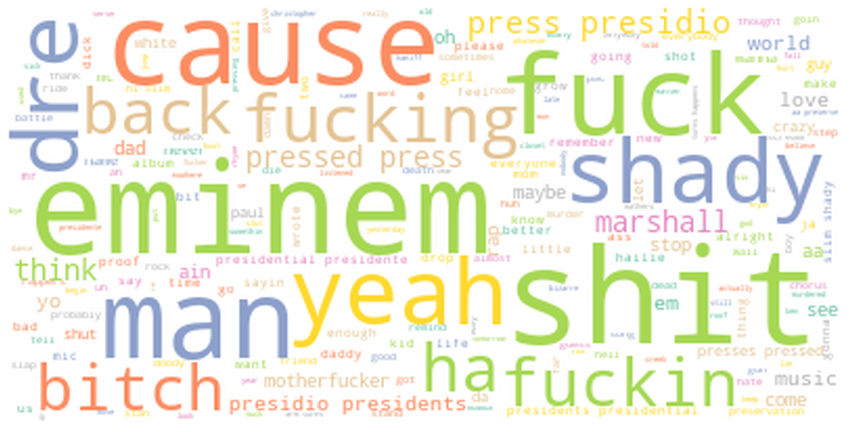

In [9]:
# Basic wordcloud

# grab key_word column from eminem table for text
eminem_text = " ".join(i for i in eminem_top10.key_word)

# set stopwords as WordCloud basic stopwords
stopwords = set(STOPWORDS)

# create wordcloud
eminem_word_cloud_1 = WordCloud(
    stopwords = stopwords, 
    background_color="white", 
    colormap="Set2"
    ).generate(eminem_text)

plt.figure(figsize = (15, 10))
plt.imshow(eminem_word_cloud_1, interpolation='blackman')
# top interpolation picks: 'spline16', 'hanning', 'kaiser', 'catrom', 'gaussian', 'sinc', 'blackman'
plt.axis("off")

# show wordcloud
plt.show()

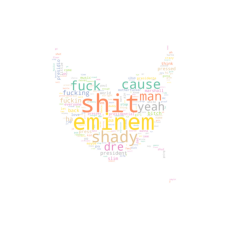

In [10]:
# shaped wordcloud 

# import image for wordcloud shape
eminem_mask = np.array(Image.open(BytesIO(requests.get('https://bit.ly/3wNcsso').content)))

# create wordcloud
eminem_word_cloud_2 = WordCloud(
    height = 2000, 
    width = 2000,
    random_state = 123,
    background_color = "white",
    colormap = "Set2",
    collocations = False,
    stopwords = STOPWORDS,
    mask = eminem_mask,
    scale = 5
).generate(eminem_text)

plt.imshow(eminem_word_cloud_2)
plt.axis("off")
plt.show()

# save wordcloud to png
eminem_word_cloud_2.to_file('word_cloud_eminem.png')

# **Mariah Carey Lyrics WordCloud**

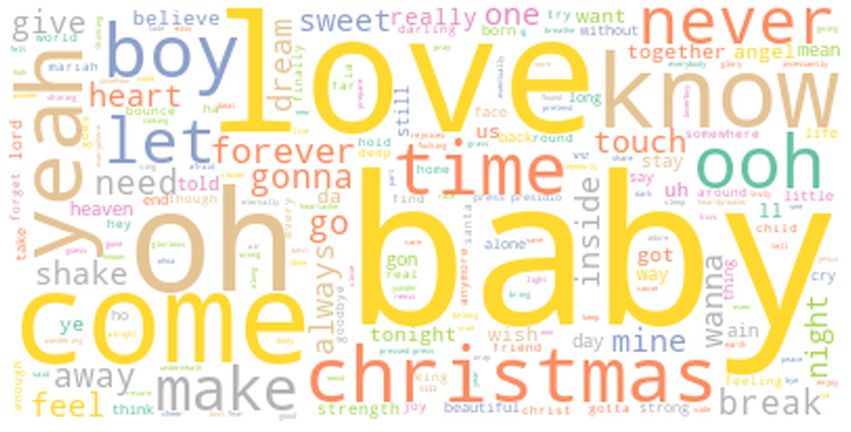

In [11]:
# basic wordcloud

# grab key_word column of mariah table for text
mariah_text = " ".join(i for i in mariah_top10.key_word)

# basic stopwords
stopwords = set(STOPWORDS)

# create wordcloud
mariah_word_cloud_1 = WordCloud(
    stopwords = stopwords, 
    background_color="white", 
    colormap="Set2"
    ).generate(mariah_text)

plt.figure(figsize = (15, 10))
plt.imshow(mariah_word_cloud_1, interpolation='blackman')
# top interpolation picks: 'spline16', 'hanning', 'kaiser', 'catrom', 'gaussian', 'sinc', 'blackman'
plt.axis("off")

plt.show()

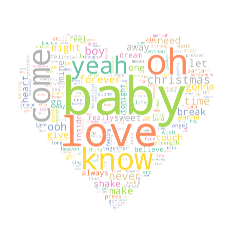

In [12]:
# shaped wordcloud 

# import image for wordcloud shape
response = requests.get('https://bit.ly/3lTJBxn')
mariah_mask = np.array(Image.open(BytesIO(response.content)))

# Generate word cloud
mariah_word_cloud_2 = WordCloud(
    height = 2000, 
    width = 2000,
    random_state = 123,
    background_color = "white",
    colormap = "Set2",
    collocations = False,
    stopwords = STOPWORDS,
    mask = mariah_mask,
    scale = 5
).generate(mariah_text)

plt.imshow(mariah_word_cloud_2)
plt.axis("off")
plt.show()

# save wordcloud to png
mariah_word_cloud_2.to_file('word_cloud_mariah.png')